In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as un
pylab.rcParams['figure.figsize'] = (10, 6)
from scipy.interpolate import InterpolatedUnivariateSpline


from matplotlib.pyplot import cm 
from scipy import interpolate
from scipy import stats

def print_now(msg):
    print(msg)
    sys.stdout.flush()


pylab.rcParams['figure.figsize'] = (12, 8)
pylab.rc('text', usetex = True)
pylab.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
pylab.rcParams['axes.labelsize'] = 25
pylab.rcParams['axes.titlesize'] = 15
pylab.rcParams['xtick.labelsize'] = 15
pylab.rcParams['ytick.labelsize'] = 15
pylab.rcParams['ytick.labelsize'] = 15
#pylab.rc('grid', c='0.5', ls='-', lw=0.5)

import os
import multiprocessing

import scipy
#from scipy.interpolate import spline
from scipy import interpolate
import time

import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib import cm
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    #ax.autoscale()
    return lc
from astropy.io import fits
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Populating the interactive namespace from numpy and matplotlib


Set path to class and change directory

In [2]:
path_to_bard_class = '/Users/boris/Work/Boris-BIG-MAC/bard_cmb_lab/codes/class_public-2.7.2/'
path_to_notebook = '/Users/boris/Work/Boris-BIG-MAC/bard_cmb_lab/notebooks/'

os.chdir(path_to_bard_class)

Plotting the Planck data using "FIT" file

In [3]:
hdul = fits.open(path_to_notebook + 'COM_PowerSpect_CMB_R2.01.fits')
hdul.info()
#To see description of data: hdul[i].data, with i = 1,2,..
low_ell = []
Dl_low_ell = []
err_m_Dl_low_ell = []
err_p_Dl_low_ell = []
for i in range(len(hdul[1].data)):
    low_ell.append(hdul[1].data[i][0])
    Dl_low_ell.append(hdul[1].data[i][1])
    err_p_Dl_low_ell.append(hdul[1].data[i][2])
    err_m_Dl_low_ell.append(hdul[1].data[i][3])
    if low_ell[i] == 29:
        break
        
high_ell = []
Dl_high_ell = []
err_Dl_high_ell = []
for i in range(len(hdul[2].data)):
    high_ell.append(hdul[2].data[i][0])
    Dl_high_ell.append(hdul[2].data[i][3])
    err_Dl_high_ell.append(hdul[2].data[i][4])

Filename: /Users/boris/Work/Boris-BIG-MAC/bard_cmb_lab/notebooks/COM_PowerSpect_CMB_R2.01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  TTLOLUNB      1 BinTableHDU     46   249R x 4C   [I, E, E, E]   
  2  TTHILBIN      1 BinTableHDU     46   83R x 5C   [E, I, I, E, E]   
  3  TTHILUNB      1 BinTableHDU     42   2479R x 3C   [I, E, E]   
  4  TEHILBIN      1 BinTableHDU     46   66R x 5C   [E, I, I, E, E]   
  5  TEHILUNB      1 BinTableHDU     42   1967R x 3C   [I, E, E]   
  6  EEHILBIN      1 BinTableHDU     46   66R x 5C   [E, I, I, E, E]   
  7  EEHILUNB      1 BinTableHDU     42   1967R x 3C   [I, E, E]   


In [4]:
Plc_BF = loadtxt(path_to_notebook + 'COM_PowerSpect_CMB-base-plikHM-TT-lowTEB-minimum-theory_R2.02.txt')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


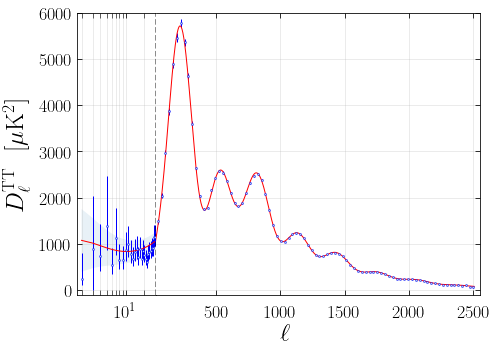

In [5]:

label_size = 18
title_size = 25
legend_size = 18
handle_length = 1.5
xscale = 'log'
yscale = 'linear'




from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1



verr = err_p_Dl_low_ell
v = Dl_low_ell
verr2 =err_m_Dl_low_ell
verr2[verr>=v] = v[verr>=v]*.999999

ax.errorbar(low_ell, Dl_low_ell, 
            yerr=[verr2,verr],elinewidth=1,capthick=1,capsize=0,
             label=r'$\mathrm{Planck\,\,data}$',color = 'b',ls='None',
            fmt = 'o',
            markerfacecolor='lightblue',markersize=2,linewidth='0.2',markeredgewidth=0.5)


ax.set_xscale('log')
ax.set_xlim((1.7, 30.))
ax.set_ylim(-100,6e3)

divider = make_axes_locatable(ax)
axLin = divider.append_axes("right",size=4.5, pad=0, sharey=ax)


axLin.errorbar(high_ell, Dl_high_ell, 
            yerr=err_Dl_high_ell,elinewidth=1,capthick=1,capsize=0,
            label=r'$\mathrm{Planck\,\,data}$',color = 'b',ls='None',
            fmt = 'o',
            markerfacecolor='lightblue',markersize=2,linewidth='0.2',markeredgewidth=0.5)







axLin.set_xlim((30., 2550.))


ax.set_yscale(yscale)
ax.set_ylabel('$D_{\ell}^\mathrm{TT}\,\,\,\,[\mu\mathrm{K}^2]$',size=title_size)




if yscale == 'log':
    axLin.yaxis.set_label_coords(-.5,0.5) 
if yscale == 'linear':
    axLin.yaxis.set_label_coords(-.5,0.5) 



ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
axLin.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)

ax.plot(Plc_BF[:,0][Plc_BF[:,0]<30],Plc_BF[:,1][Plc_BF[:,0]<30],color = 'r',ls='-',lw=1)
axLin.plot(Plc_BF[:,0][Plc_BF[:,0]>=30],Plc_BF[:,1][Plc_BF[:,0]>=30],color = 'r',ls='-',lw=1)



cosmiv_variance_low_ell_low = np.asarray(Plc_BF[:,1][Plc_BF[:,0]<30])-np.sqrt(2./(2.*np.asarray(Plc_BF[:,0][Plc_BF[:,0]<30])+1.))*np.asarray(Plc_BF[:,1][Plc_BF[:,0]<30])
cosmiv_variance_low_ell_high = np.asarray(Plc_BF[:,1][Plc_BF[:,0]<30])+np.sqrt(2./(2.*np.asarray(Plc_BF[:,0][Plc_BF[:,0]<30])+1.))*np.asarray(Plc_BF[:,1][Plc_BF[:,0]<30])

ax.fill_between(Plc_BF[:,0][Plc_BF[:,0]<30],cosmiv_variance_low_ell_low,cosmiv_variance_low_ell_high,alpha=0.1)

#unbined cosmic variance
#cosmiv_variance_high_ell_low = np.asarray(Plc_BF[:,1][Plc_BF[:,0]>=30])-np.sqrt(2./(2.*np.asarray(Plc_BF[:,0][Plc_BF[:,0]>=30])+1.))*np.asarray(Plc_BF[:,1][Plc_BF[:,0]>=30])
#cosmiv_variance_high_ell_high = np.asarray(Plc_BF[:,1][Plc_BF[:,0]>=30])+np.sqrt(2./(2.*np.asarray(Plc_BF[:,0][Plc_BF[:,0]>=30])+1.))*np.asarray(Plc_BF[:,1][Plc_BF[:,0]>=30])
#axLin.fill_between(Plc_BF[:,0][Plc_BF[:,0]>=30],cosmiv_variance_high_ell_low,cosmiv_variance_high_ell_high,alpha=0.1)





#multiline(xs, ys, np.log(1e10*param_values),ax=axLin, cmap='jet', lw=2)

#ax.legend(loc=2,ncol=2,prop={'size':14},handlelength=handle_length,frameon=False)

axLin.set_xlabel('$\ell$',size=title_size)
axLin.xaxis.set_label_coords(.4,-0.1) 
axLin.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis = 'y',length=5,direction='in', pad=5)

axLin.yaxis.set_ticks_position('right')
axLin.tick_params(axis = 'y',length=5,direction='in', pad=5)



axLin.xaxis.set_ticks_position('both')


ax.axvline(30,ls='--',alpha=0.6,c='k')

plt.setp(ax.get_yticklabels(), fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
plt.setp(axLin.get_xticklabels(), fontsize=label_size)
plt.setp(axLin.get_yticklabels(), visible=False)
ax.grid( b=True, which='both', alpha=0.3, linestyle='-')
axLin.grid( b=True, which='both', alpha=0.3, linestyle='-')




fig.tight_layout()


#figure_name = 'bard_planck_data.pdf'
#plt.savefig(path_to_notebook + figure_name)    

Define parameter X and range ("one by one")

In [6]:
param = 'h'
col_label = r'$h$'
param_value_min = 0.5
param_value_max = 0.9
param_spacing = 'lin'


Open bard_parameters_varying_X.ini and run class for many different values of parameter X

In [7]:
N_param_values = 11
param_name = param + ' ='
str_param = 'varying_' + param

if param_spacing == 'log':
    param_values = np.logspace(np.log10(param_value_min),np.log10(param_value_max),N_param_values)
if param_spacing == 'lin':
    param_values = np.linspace(param_value_min,param_value_max,N_param_values)


param_file_content = []
with open(path_to_bard_class + 'bard_parameters.ini', 'r') as file:
    param_file_content = file.readlines()
    file.close()

index_root = 0
i = 0
root_name = 'root = output/bard_'
for line in param_file_content:
    if root_name == line[:len(root_name)]:
        index_root = i
    i+=1




i = 0

for line in param_file_content:
    if param_name == line[:len(param_name)]:
        index_param = i
    i+=1



new_param_file_content = []

start_time = time.time()
for p in param_values:
    new_param_file_content =  param_file_content
    new_param = param_name + str(p)+'\n'
    p3 = "%.4e" % p
    print('Computing for ' + param_name +str(p3))
    new_root = root_name + str_param + '_'+str(p3[0])+'d'+str(p3[2:])+'_\n'
    new_param_file_content[index_param] = new_param
    new_param_file_content[index_root] = new_root
    with open(path_to_bard_class + 'bard_parameters_' + str_param + '.ini', 'w') as file:
        file.writelines(new_param_file_content)
        file.close()
    str_cmd = './class bard_parameters_' + str_param + '.ini'
    os.system(str_cmd)
print("--- %.3f seconds ---" % (time.time() - start_time))
    

Computing for h =5.0000e-01
Computing for h =5.4000e-01
Computing for h =5.8000e-01
Computing for h =6.2000e-01
Computing for h =6.6000e-01
Computing for h =7.0000e-01
Computing for h =7.4000e-01
Computing for h =7.8000e-01
Computing for h =8.2000e-01
Computing for h =8.6000e-01
Computing for h =9.0000e-01
--- 16.365 seconds ---


Now we plot several quantities for all these values of parameter

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:188: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


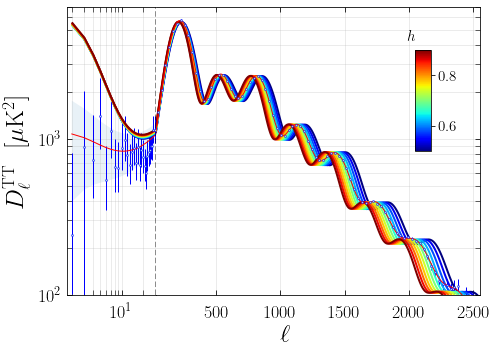

In [11]:
N = len(param_values)

values = range(N)



label_size = 18
title_size = 25
legend_size = 18
handle_length = 1.5
xscale = 'log'
yscale = 'log'




from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1



#verr = err_p_Dl_low_ell
#v = Dl_low_ell
#verr2 =err_m_Dl_low_ell
#verr2[verr>=v] = v[verr>=v]*.999999

ax.errorbar(low_ell, Dl_low_ell, 
            yerr=[verr2,verr],elinewidth=1,capthick=1,capsize=0,
             label=r'$\mathrm{Planck\,\,data}$',color = 'b',ls='None',
            fmt = 'o',
            markerfacecolor='lightblue',markersize=2,linewidth='0.2',markeredgewidth=0.5)


ax.set_xscale('log')
ax.set_xlim((1.7, 30.))

if param == 'A_s': 
    ax.set_ylim(100,3e4)
else: 
    ax.set_ylim(100,7e3)


divider = make_axes_locatable(ax)
axLin = divider.append_axes("right",size=4.5, pad=0, sharey=ax)


axLin.errorbar(high_ell, Dl_high_ell, 
            yerr=err_Dl_high_ell,elinewidth=1,capthick=1,capsize=0,
            label=r'$\mathrm{Planck\,\,data}$',color = 'b',ls='None',
            fmt = 'o',
            markerfacecolor='lightblue',markersize=2,linewidth='0.2',markeredgewidth=0.5)







axLin.set_xlim((30., 2550.))


ax.set_yscale(yscale)
ax.set_ylabel('$D_{\ell}^\mathrm{TT}\,\,\,\,[\mu\mathrm{K}^2]$',size=title_size)




if yscale == 'log':
    axLin.yaxis.set_label_coords(-.5,0.5) 
if yscale == 'linear':
    axLin.yaxis.set_label_coords(-.5,0.5) 



ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
axLin.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)

ax.plot(Plc_BF[:,0][Plc_BF[:,0]<30],Plc_BF[:,1][Plc_BF[:,0]<30],color = 'r',ls='-',lw=1)
axLin.plot(Plc_BF[:,0][Plc_BF[:,0]>=30],Plc_BF[:,1][Plc_BF[:,0]>=30],color = 'r',ls='-',lw=1)



cosmiv_variance_low_ell_low = np.asarray(Plc_BF[:,1][Plc_BF[:,0]<30])-np.sqrt(2./(2.*np.asarray(Plc_BF[:,0][Plc_BF[:,0]<30])+1.))*np.asarray(Plc_BF[:,1][Plc_BF[:,0]<30])
cosmiv_variance_low_ell_high = np.asarray(Plc_BF[:,1][Plc_BF[:,0]<30])+np.sqrt(2./(2.*np.asarray(Plc_BF[:,0][Plc_BF[:,0]<30])+1.))*np.asarray(Plc_BF[:,1][Plc_BF[:,0]<30])

ax.fill_between(Plc_BF[:,0][Plc_BF[:,0]<30],cosmiv_variance_low_ell_low,cosmiv_variance_low_ell_high,alpha=0.1)


#unbined cosmic variance
#cosmiv_variance_high_ell_low = np.asarray(Plc_BF[:,1][Plc_BF[:,0]>=30])-np.sqrt(2./(2.*np.asarray(Plc_BF[:,0][Plc_BF[:,0]>=30])+1.))*np.asarray(Plc_BF[:,1][Plc_BF[:,0]>=30])
#cosmiv_variance_high_ell_high = np.asarray(Plc_BF[:,1][Plc_BF[:,0]>=30])+np.sqrt(2./(2.*np.asarray(Plc_BF[:,0][Plc_BF[:,0]>=30])+1.))*np.asarray(Plc_BF[:,1][Plc_BF[:,0]>=30])
#axLin.fill_between(Plc_BF[:,0][Plc_BF[:,0]>=30],cosmiv_variance_high_ell_low,cosmiv_variance_high_ell_high,alpha=0.1)

xs = []
ys = []

for idx in values:
    p3 = "%.4e" % param_values[idx]
    if param == '100*theta_s':
        p3 = "%.4e" % param_values[idx]
    new_root = 'output/bard_'+str_param+'_'+str(p3[0])+'d'+str(p3[2:])+'_'+'cls.dat'
    DATA = np.loadtxt(new_root)
    xs.append(DATA[:,0][DATA[:,0]<30])
    ys.append(DATA[:,1][DATA[:,0]<30])
ys = np.asarray(ys)*(2.7255e6)**2

if param == 'A_s':
    multiline(xs, ys, np.log(1e10*param_values),ax=ax, cmap='jet', lw=2)
else:
    multiline(xs, ys, param_values,ax=ax, cmap='jet', lw=2)



xs = []
ys = []

for idx in values:
    p3 = "%.4e" % param_values[idx]
    if param == '100*theta_s':
        p3 = "%.4e" % param_values[idx]
    new_root = 'output/bard_'+str_param+'_'+str(p3[0])+'d'+str(p3[2:])+'_'+'cls.dat'
    DATA = np.loadtxt(new_root)
    xs.append(DATA[:,0][DATA[:,0]>30])
    ys.append(DATA[:,1][DATA[:,0]>30])
ys = np.asarray(ys)*(2.7255e6)**2


if param == 'A_s':
    lc = multiline(xs, ys, np.log(1e10*param_values),ax=axLin, cmap='jet', lw=2)
else:
    lc = multiline(xs, ys, param_values,ax=axLin, cmap='jet', lw=2)


    
    

axins = inset_axes(axLin,
                   width="5%",  # width = 5% of parent_bbox width
                   height="35%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0.8, 0.5, 1, 1),
                   bbox_transform=axLin.transAxes,
                   borderpad=0,
                   )
axcb = fig.colorbar(lc,cax=axins)


if param == 'A_s':
    axcb.set_label(col_label,rotation=0,labelpad = -10,y=1.2,size=15)
else:
    axcb.set_label(col_label,rotation=0,labelpad = -45,y=1.2,size=15)




axLin.set_xlabel('$\ell$',size=title_size)
axLin.xaxis.set_label_coords(.4,-0.1) 
axLin.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)

axLin.yaxis.set_ticks_position('right')
axLin.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)



axLin.xaxis.set_ticks_position('both')


ax.axvline(30,ls='--',alpha=0.6,c='k')

plt.setp(ax.get_yticklabels(), fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
plt.setp(axLin.get_xticklabels(), fontsize=label_size)
plt.setp(axLin.get_yticklabels(), visible=False)

ax.grid( b=True, which='both', alpha=0.3, linestyle='-')
axLin.grid( b=True, which='both', alpha=0.3, linestyle='-')




fig.tight_layout()


#figure_name = 'bard_varying_' + param + '_cl_TT_day-2.pdf'
#plt.savefig(path_to_notebook + figure_name)  